In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from matplotlib import ticker

from IPython.display import display

In [2]:
path_to_data = 'data\\Новые данные\\Run1\\run1_WM32_data.csv'

In [3]:
def get_df(path: str):
    df = pd.read_csv(path, delimiter=';')
    return df

In [4]:
# подготовить датафрейм к передачи в модель 
#(разбивает числа в ячейках так, что сначала идут 32 числа - амплитуд, потом 32 - времен в одном столбце)
def prepare_df(df):
    new_df = pd.DataFrame()

    for col in df.columns:
        temp = df[col].str.split(pat=':', expand=True)
        new_df[col] = pd.concat([temp[0], temp[1]], axis = 0)
        new_df[col] = new_df[col].astype(float)
    
    new_df['index'] = range(new_df.shape[0])
    new_df = new_df.set_index('index')
    
    return new_df

In [5]:
# Чтение данных из файла
first_df = get_df(path_to_data)

In [6]:
# Удаляем пустые столбцы
print(first_df.shape)
first_df = first_df.T
for col in first_df.columns:
    first_df = first_df.loc[~first_df[col].isin(['--'])]
first_df = first_df.T
print(first_df.shape)

(115, 402)
(115, 399)


In [7]:
# Что прочли из файла
first_df.index.name = 'index'
first_df = first_df.drop('row', axis=1)
first_df = first_df.drop('position', axis=1)
display(first_df)

,detector_0,detector_1,detector_2,detector_3,detector_4,detector_5,detector_6,detector_7,detector_8,detector_9,...,detector_390,detector_391,detector_392,detector_393,detector_394,detector_395,detector_396,detector_397,detector_398,detector_399
index,,,,,,,,,,,,,,,,,,,,,
0,"25.8:37.947,26.1:-54.259,26.2:61.709,26.3:-59....","25.6:33.941,25.8:-55.714,25.9:61.188,26.1:-60....","25.3:41.183,25.5:-54.553,25.7:61.709,25.8:-60....","25.6:45.607,25.8:-57.131,25.9:62.482,26.1:-61....","25.9:41.183,26.2:-55.136,26.3:61.709,26.5:-60....","25.8:40,26.1:-55.136,26.2:61.709,26.3:-60.663,...","25.5:48.332,25.7:-57.411,25.8:61.968,25.9:-61....","25.5:29.394,25.7:-32.496,25.7:47.329,25.9:-58....","25.6:43.081,25.9:-52.154,26:61.449,26.1:-60.39...","25.6:45.255,25.9:-56.285,26:62.225,26.1:-60.92...",...,"25.5:32.985,25.7:-50.279,25.8:53.963,25.9:-48....","25.9:35.777,26.1:-53.963,26.2:55.426,26.4:-48....","25.8:33.466,25.9:-51.225,26.1:48.662,26.3:-46....","25.6:37.947,25.8:-52.154,25.9:54.845,26.1:-51....","25.6:37.094,25.7:-53.367,25.9:51.536,26:-48.33...","25.6:26.533,25.8:33.941,26:-55.426,26.1:60.399...","25.5:30.463,25.6:29.933,25.8:-55.714,25.9:61.1...","25.3:32.985,25.5:-51.536,25.6:60.663,25.7:-57....","25.1:32,25.2:-30.463,25.3:34.871,25.5:-56.851,...","25.1:34.409,25.4:-52.46,25.5:60.399,25.7:-57.4..."
1,"25.8:37.094,26:-55.426,26.1:61.188,26.3:-59.59...","25.6:35.327,25.9:-52.154,26:60.926,26.1:-59.59...","25.3:40.792,25.5:-55.426,25.7:61.968,25.8:-60....","25.6:40,25.8:-48,25.9:46.989,25.9:-52.764,26.1...","25.9:41.952,26.2:-54.553,26.3:61.709,26.5:-60....","25.6:41.183,25.8:-51.536,25.9:-51.536,26:60.92...","25.5:47.666,25.7:-57.966,25.8:61.968,25.9:-61....","25.8:-29.394,25.9:35.777,25.9:-44.181,26:48.33...","25.6:44.9,25.9:-53.666,26:61.709,26.1:-60.663,...","25.5:45.255,25.7:-56.569,25.9:62.225,26:-60.66...",...,"25.5:33.941,25.7:-48,25.8:57.411,25.9:-53.666,...","25.9:38.367,26.1:-49.96,26.3:55.714,26.4:-50.5...","25.8:35.777,26:-50.279,26.2:54.553,26.3:-47.66...","24.7:23.324,25.7:39.598,25.8:-53.066,26:54.259...","25.5:24.658,25.7:-40,25.8:-56,25.9:59.599,26.1...","25.6:26.533,25.8:40,26:-54.553,26.1:60.926,26....","25.3:28.284,25.4:32.985,25.7:-56.851,25.8:61.1...","25.3:30.463,25.5:-53.066,25.7:59.867,25.8:-55....","25:29.394,25.1:30.984,25.3:-56.851,25.5:61.188...","25:34.409,25.3:-55.426,25.4:61.188,25.5:-59.05..."
2,"25.6:34.409,25.8:-57.966,25.9:61.968,26.1:-60....","25.5:36.222,25.7:-48.99,25.8:60.133,25.9:-59.0...","25.5:40.398,25.7:-56.851,25.8:62.225,25.9:-61....","25.6:31.496,25.7:-35.327,25.9:39.192,26:-58.51...","25.8:41.183,26.1:-52.154,26.2:60.926,26.3:-59....","25.6:41.569,25.9:-51.536,26:61.188,26.1:-60.39...","25.5:44.9,25.7:-54.259,25.8:61.709,25.9:-60.66...","25.9:-29.933,26.1:40.398,26.2:-40.792,26.3:-58...","25.6:45.255,25.9:-54.259,26:61.968,26.1:-60.92...","25.5:45.255,25.7:-56,25.8:61.968,25.9:-60.663,...",...,"25.5:38.781,25.7:-55.426,25.8:59.599,25.9:-54....","25.9:37.523,26.1:-53.963,26.3:59.33,26.4:-57.1...","25.8:35.327,25.9:-44.9,26:-35.327,26.1:53.367,...","24.7:27.129,24.8:-25.298,25.7:36.661,25.9:-56....","25.5:25.298,25.6:32,25.8:-54.553,25.9:59.33,26...","25.6:27.713,25.8:40.398,26:-53.666,26.1:60.663...","25.3:29.394,25.4:-27.713,25.7:-57.131,25.8:61....","25.1:30.463,25.3:35.777,25.5:-54.259,25.6:60.9...","25.3:29.394,25.5:-56.569,25.6:60.663,25.7:-58....","25:34.871,25.1:-35.327,25.3:-51.846,25.4:60.39..."
3,"25.5:37.094,25.8:-51.536,25.9:60.926,26:-58.51...","25.5:35.327,25.7:-54.845,25.8:61.709,25.9:-60....","25.3:30.463,25.5:-28.844,25.7:-59.599,25.8:62....","25.8:40,25.9:-45.957,26.1:-52.764,26.2:60.399,...","25.8:41.569,25.9:-46.989,26.1:-59.059,26.2:62....","25.6:41.569,25.9:-51.536,26:60.663,26.1:-59.33...","25.5:41.569,25.7:-56.569,25.8:61.968,25.9:-60....","26.1:34.871,26.2:-41.183,26.3:40.398,26.5:-56....","25.6:44.542,25.9:-54.845,26:61.709,26.1:-60.66...","25.5:45.255,25.7:-56.285,25.8:61.968,25.9:-60....",...,"25.5:38.781,25.7:-52.154,25.8:59.33,25.9:-55.1...","26.1:36.222

In [8]:
test_df = first_df[:1]
test_df = test_df.iloc[0].str.split(pat=',', expand=True)
test_df = test_df.T
test_df.index.name = 'index'
display(test_df)

,detector_0,detector_1,detector_2,detector_3,detector_4,detector_5,detector_6,detector_7,detector_8,detector_9,...,detector_390,detector_391,detector_392,detector_393,detector_394,detector_395,detector_396,detector_397,detector_398,detector_399
index,,,,,,,,,,,,,,,,,,,,,
0,25.8:37.947,25.6:33.941,25.3:41.183,25.6:45.607,25.9:41.183,25.8:40,25.5:48.332,25.5:29.394,25.6:43.081,25.6:45.255,...,25.5:32.985,25.9:35.777,25.8:33.466,25.6:37.947,25.6:37.094,25.6:26.533,25.5:30.463,25.3:32.985,25.1:32,25.1:34.409
1,26.1:-54.259,25.8:-55.714,25.5:-54.553,25.8:-57.131,26.2:-55.136,26.1:-55.136,25.7:-57.411,25.7:-32.496,25.9:-52.154,25.9:-56.285,...,25.7:-50.279,26.1:-53.963,25.9:-51.225,25.8:-52.154,25.7:-53.367,25.8:33.941,25.6:29.933,25.5:-51.536,25.2:-30.463,25.4:-52.46
2,26.2:61.709,25.9:61.188,25.7:61.709,25.9:62.482,26.3:61.709,26.2:61.709,25.8:61.968,25.7:47.329,26:61.449,26:62.225,...,25.8:53.963,26.2:55.426,26.1:48.662,25.9:54.845,25.9:51.536,26:-55.426,25.8:-55.714,25.6:60.663,25.3:34.871,25.5:60.399
3,26.3:-59.867,26.1:-60.399,25.8:-60.663,26.1:-61.188,26.5:-60.399,26.3:-60.663,25.9:-61.188,25.9:-58.788,26.1:-60.399,26.1:-60.926,...,25.9:-48.332,26.4:-48.662,26.3:-46.989,26.1:-51.536,26:-48.332,26.1:60.399,25.9:61.188,25.7:-57.411,25.5:-56.851,25.7:-57.411
4,26.5:55.136,26.2:56,26:55.426,26.2:60.133,26.6:57.411,26.4:57.411,26.1:58.515,26:61.188,26.3:56,26.2:57.966,...,26.1:40.398,26.5:43.818,26.4:39.192,26.3:43.081,26.1:40.398,26.2:-56,26:-58.788,25.9:53.963,25.6:61.188,25.8:52.764
5,26.6:-46.648,26.3:-48,26.1:-48,26.3:-53.367,26.8:-48.662,26.6:-45.957,26.3:-45.607,26.1:-59.599,26.4:-48.662,26.4:-48,...,26.2:-39.598,26.6:-44.542,26.6:-41.569,26.5:-41.569,26.3:-40,26.4:45.957,26.1:54.845,26:-47.666,25.7:-58.788,26:-45.957
6,27.1:39.598,26.6:39.598,26.2:44.9,26.4:44.9,26.9:46.648,26.7:47.666,26.4:46.303,26.2:53.963,26.5:46.989,26.5:45.255,...,26.3:-33.466,26.7:44.9,26.8:36.661,26.6:44.542,26.4:30.463,26.5:-43.451,26.3:-46.648,26.3:38.781,25.9:51.225,26.1:40.792
7,29.1:47.666,26.7:-33.941,28.6:48.99,26.5:-37.094,27:-34.409,26.8:-39.598,28.8:49.639,26.3:-45.607,28.9:49.315,26.7:-33.466,...,26.5:34.409,26.9:-44.542,26.9:-35.777,26.7:-40.792,26.6:37.523,26.8:38.367,26.4:42.708,28.5:48,26:-47.666,28.4:46.989
8,29.3:-54.845,26.9:34.409,28.7:-56.569,26.6:33.941,28:-34.409,29.1:49.315,28.9:-57.689,26.5:44.542,29:-56.285,28.9:49.639,...,26.6:24,27:40.398,27:41.569,26.8:32,26.7:-41.952,26.9:-38.781,26.6:42.332,28.5:-56.285,26.1:40.398,28.5:-54.553


In [9]:
test_df = prepare_df(test_df)

In [10]:
#display(test_df[:31])
temp = test_df[:31]
temp = temp.append(temp.iloc[-1], ignore_index = True)
#display(temp)

temp2 = test_df[31:]
temp2.index = [i for i in range(32,63)]
temp2 = temp2.append(temp2.iloc[-1], ignore_index = True)
#display(temp2)

test_df = pd.concat([temp, temp2], axis=0)
display(test_df)
#test_df = test_df.T
#test_df[62] = [0 for i in range(test_df.shape[0])]
#test_df[63] = [0 for i in range(test_df.shape[0])]
#display(test_df[])

,detector_0,detector_1,detector_2,detector_3,detector_4,detector_5,detector_6,detector_7,detector_8,detector_9,...,detector_390,detector_391,detector_392,detector_393,detector_394,detector_395,detector_396,detector_397,detector_398,detector_399
0,25.800,25.600,25.300,25.600,25.900,25.800,25.500,25.500,25.600,25.600,...,25.500,25.900,25.800,25.600,25.600,25.600,25.500,25.300,25.100,25.100
1,26.100,25.800,25.500,25.800,26.200,26.100,25.700,25.700,25.900,25.900,...,25.700,26.100,25.900,25.800,25.700,25.800,25.600,25.500,25.200,25.400
2,26.200,25.900,25.700,25.900,26.300,26.200,25.800,25.700,26.000,26.000,...,25.800,26.200,26.100,25.900,25.900,26.000,25.800,25.600,25.300,25.500
3,26.300,26.100,25.800,26.100,26.500,26.300,25.900,25.900,26.100,26.100,...,25.900,26.400,26.300,26.100,26.000,26.100,25.900,25.700,25.500,25.700
4,26.500,26.200,26.000,26.200,26.600,26.400,26.100,26.000,26.300,26.200,...,26.100,26.500,26.400,26.300,26.100,26.200,26.000,25.900,25.600,25.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,29.933,29.394,-40.398,17.889,39.598,32.985,-37.094,-35.327,-36.222,-42.332,...,25.923,24.658,-32.000,24.000,29.394,-35.327,-29.933,40.398,37.523,37.523
28,-34.871,-35.327,38.781,16.000,-32.000,-38.367,-40.792,27.713,38.781,39.598,...,18.762,23.324,27.713,-32.985,-21.909,30.984,-34.409,-38.781,-36.222,-35.327
29,-26.533,30.984,-34.871,14.967,-35.327,32.985,39.598,22.627,-34.871,-37.523,...,-22.627,-27.129,17.889,27.713,-22.627,-29.933,32.985,37.094,33.941,33.466
30,-28.284,-29.933,33.466,-16.000,33.466,-33.466,-37.523,-25.923,33.466,33.941,...,18.762,22.627,-20.396,-20.396,21.909,-27.129,-28.844,-34.871,-32.985,-32.000


In [11]:
model = keras.models.load_model('NetWork_64_to_64_loss_0,1126')

In [12]:
i = 0

In [13]:
input_data = test_df.T[i:i+1]

In [14]:
display(input_data)
'''display(input_data.T[:20])
display(input_data.T[20:40])
display(input_data.T[40:])'''

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
detector_0,25.8,26.1,26.2,26.3,26.5,26.6,27.1,29.1,29.3,29.4,...,-29.394,36.222,-41.183,34.871,-27.713,29.933,-34.871,-26.533,-28.284,-28.284


'display(input_data.T[:20])\ndisplay(input_data.T[20:40])\ndisplay(input_data.T[40:])'

In [15]:
res = model.predict(input_data)

In [16]:
temp = input_data.to_numpy()

input_data = pd.DataFrame()

input_data['Time'] = temp[0][:32]
input_data['Amplitude'] = temp[0][32:]
input_data = input_data.astype(float)

display(input_data.T)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Time,25.800,26.100,26.200,26.300,26.500,26.600,27.100,29.100,29.300,29.40,...,34.900,35.200,35.300,35.500,36.100,38.300,38.400,39.100,41.500,41.500
Amplitude,37.947,-54.259,61.709,-59.867,55.136,-46.648,39.598,47.666,-54.845,52.46,...,-29.394,36.222,-41.183,34.871,-27.713,29.933,-34.871,-26.533,-28.284,-28.284


In [17]:
output_data = pd.DataFrame()

output_data['Time'] = res[0][:32]
output_data['Amplitude'] = res[0][32:]
output_data = output_data.astype(float)

display(output_data.T)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Time,18.229134,17.874189,2.733740,19.405539,28.397636,13.540949,29.459265,22.342787,20.919573,25.043209,...,47.028152,34.668697,48.372051,44.73251,44.995834,49.829082,27.283878,45.491634,54.391941,43.893234
Amplitude,36.545563,-46.966377,61.733086,-60.659657,52.665421,-27.488203,16.646030,-4.326637,16.835688,-16.255247,...,-5.835574,12.506184,4.843564,0.55795,-0.901460,-3.392325,-7.032898,-2.363456,7.172009,2.176679


In [18]:
# начальные данные
x1 = np.array(input_data['Time'])
y1 = np.array(input_data['Amplitude'])

# полученные данные
x2 = np.array(output_data['Time'])
y2 = np.array(output_data['Amplitude'])

In [19]:
'''plt.plot(x1, y1, label='input_data', linestyle = '-')
plt.plot(x2, y2, label='output_data', linestyle = '-')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Результат работы нейронки')

plt.legend(fontsize = 10, facecolor = "white")'''

'plt.plot(x1, y1, label=\'input_data\', linestyle = \'-\')\nplt.plot(x2, y2, label=\'output_data\', linestyle = \'-\')\n\nplt.xlabel(\'Time\')\nplt.ylabel(\'Amplitude\')\nplt.title(\'Результат работы нейронки\')\n\nplt.legend(fontsize = 10, facecolor = "white")'

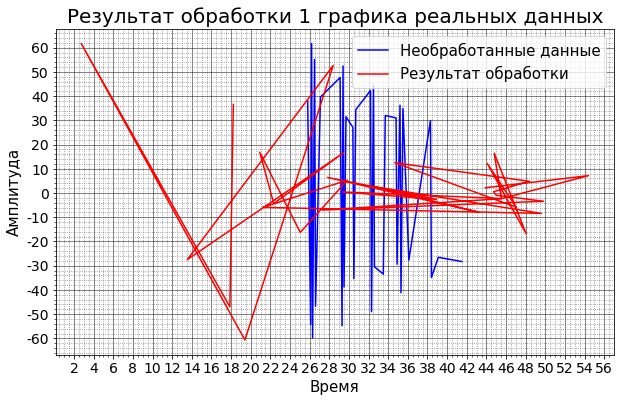

In [20]:
# Вывод графика изменения ошибки

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)


plt.plot(x1, y1, label='Необработанные данные', linestyle = '-', color='blue', linewidth=1.5)
plt.plot(x2, y2, label='Результат обработки', linestyle = '-', color='red', linewidth=1.5)

ax.set_title('Результат обработки 1 графика реальных данных', fontsize=20)
ax.set_xlabel('Время', fontsize=15)
ax.set_ylabel('Амплитуда', fontsize=15)

#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

#  Устанавливаем форматирование чисел основных делений:
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.d'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.d'))

#  Устанавливаем форматирование делений:
ax.xaxis.set_tick_params(which = 'major', labelsize = 14)
ax.yaxis.set_tick_params(which = 'major', labelsize = 14)

ax.minorticks_on()
ax.grid(which='major', color = 'k', alpha = 0.6)
ax.grid(which='minor', color = 'gray', linestyle = ':')

ax.legend(fontsize = 15, facecolor = "white", loc = 'upper right')

plt.show()